In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv(r"C:\Users\shiva\Documents\codes\INFOSYS-SPRINGBOARD\archive (4)\dataset - 2020-09-24.csv");
raw_data.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [3]:
raw_data.shape

(571, 59)

In [4]:
raw_data.info   # tells which columns are numerical, categorial, missing etc.

<bound method DataFrame.info of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward

In [5]:
# summary statistics for numerical columns
raw_data.describe

<bound method NDFrame.describe of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forwa

In [6]:
# checking for number of missing values in each column
raw_data.isnull().sum()

Name                        0
Jersey Number               8
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Hit woodwork               69
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Last man tackles          378
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Clearances off line       378
Recoveries                181
Duels won                 181
Duels lost

In [7]:
# exploring all the columns present in the dataset
raw_data.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [8]:
# we observe that there are role specific columns, for example -- goalkeeper stats are missing from all non-goal keepers (saves, penalties saved, punches, high claims etc)

#So first we will separate the role specific columns as per the roles

goal_keeper_cols = [
    'Saves', 'Penalties saved', 'Punches', 'High Claims', 'Catches',
    'Sweeper clearances', 'Throw outs', 'Goal Kicks'
]

defender_cols = [
    'Tackles', 'Tackle success %', 'Last man tackles', 'Interceptions',
    'Clearances', 'Headed Clearance', 'Clearances off line',
    'Recoveries', 'Blocked shots', 'Aerial battles won', 'Aerial battles lost'
]

attacker_cols = [
    'Goals', 'Goals per match', 'Shots', 'Shots on target',
    'Big chances missed', 'Hit woodwork',
    'Headed goals', 'Goals with right foot', 'Goals with left foot',
    'Penalties scored', 'Freekicks scored', 'Shooting accuracy %'
]

midfielder_cols = [
    'Passes', 'Passes per match', 'Assists', 'Through balls',
    'Accurate long balls', 'Crosses', 'Cross accuracy %',
    'Big chances created'
]




In [9]:
# checking the unique values if positions which exist
raw_data['Position'].unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], dtype=object)

In [10]:
# now dropping the globally irrelevant columns
raw_data.drop(['Name', 'Jersey Number', 'Nationality'], axis=1, inplace=True)

In [11]:
# we will make a copy of the original dataset to proceed further
raw_data_copy = raw_data

In [12]:
# since all 0s cannot mean null values, some 0s may have statistical significance
# APPROACH -- if a goal-keeper has 0 for attacker columns, means they are nan values, but if an attacker has 0 for attacker columns that means 0s are significant. So we will handle role-wise

import numpy as np

# for a goal-keeper, the 0s in attacker, defender, midfielder columns mean nan values
raw_data_copy.loc[raw_data['Position'] == 'Goalkeeper', attacker_cols + midfielder_cols + defender_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Goalkeeper', attacker_cols + midfielder_cols + defender_cols].replace(0, np.nan)

# Defenders should not have attacker only stats
raw_data_copy.loc[raw_data['Position'] == 'Defender', attacker_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Defender', attacker_cols].replace(0, np.nan)

# Attackers/ Forwards should not have goal-keeper or defender only stats
raw_data_copy.loc[raw_data['Position'] == 'Forward', goal_keeper_cols + defender_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Forward', goal_keeper_cols + defender_cols].replace(0, np.nan)

# Midfielders should not have goal keeper or pure defender stats
raw_data_copy.loc[raw_data['Position'] == 'Midfielder', goal_keeper_cols + defender_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Midfielder', goal_keeper_cols + defender_cols].replace(0, np.nan)





In [13]:
# Now the next step if to fill the nan values with means role-wise

# For goal-keeper columns
raw_data_copy.loc[raw_data['Position'] == 'Goalkeeper', goal_keeper_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Goalkeeper', goal_keeper_cols].fillna(
    raw_data.groupby('Position')[goal_keeper_cols].transform('mean')
)

# For defender columns
raw_data_copy.loc[raw_data['Position'] == 'Defender', defender_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Defender', defender_cols].fillna(
    raw_data.groupby('Position')[goal_keeper_cols].transform('mean')
)

# For Mid-fielder columns
raw_data_copy.loc[raw_data['Position'] == 'Midfielder', midfielder_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Midfielder', midfielder_cols].fillna(
    raw_data.groupby('Position')[goal_keeper_cols].transform('mean')
)

# For Attacker/ Forward columns
raw_data_copy.loc[raw_data['Position'] == 'Forward', attacker_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Forward', attacker_cols].fillna(
    raw_data.groupby('Position')[goal_keeper_cols].transform('mean')
)

In [14]:
# here we can observe that all the non-goal-keeper stats are nan for a goal-keeper, all the goal-keeper stats are nan for other roles, means those columns are irrelevant for that role
raw_data_copy.head()

,Club,Position,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Arsenal,Goalkeeper,28.0,64,28,16,NaN,NaN,NaN,NaN,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Arsenal,Goalkeeper,26.0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Arsenal,Goalkeeper,25.0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Arsenal,Defender,25.0,160,90,37,7.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Arsenal,Defender,23.0,16,7,5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [15]:
raw_data_copy.tail()

,Club,Position,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Wolverhampton-Wanderers,Forward,20.0,31,14,7,3.0,0.10,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Wolverhampton-Wanderers,Forward,29.0,78,32,23,32.0,0.41,9.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Wolverhampton-Wanderers,Forward,24.0,105,27,47,5.0,0.05,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Wolverhampton-Wanderers,Forward,18.0,1,0,1,0.0,1.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Wolverhampton-Wanderers,Forward,20.0,0,0,0,0.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [16]:
raw_data_copy['Cross accuracy %'].dtype

dtype('O')

## Exploratory data analysis - (plotting the graphs and plots)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


### Histogram - goals vs. frequency

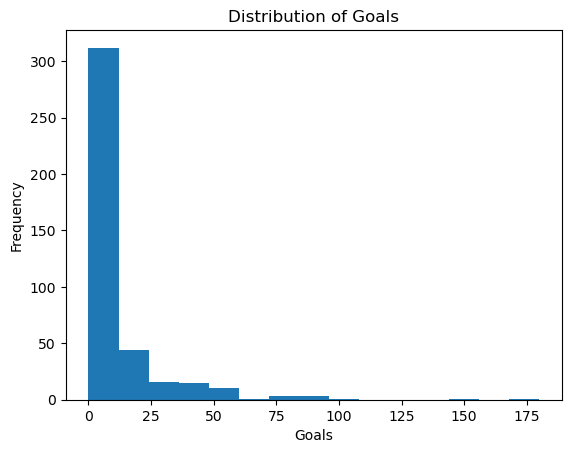

In [18]:
plt.figure()
plt.hist(raw_data_copy['Goals'], bins=15)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals')
plt.show()


### Scatter — Appearances vs Goals

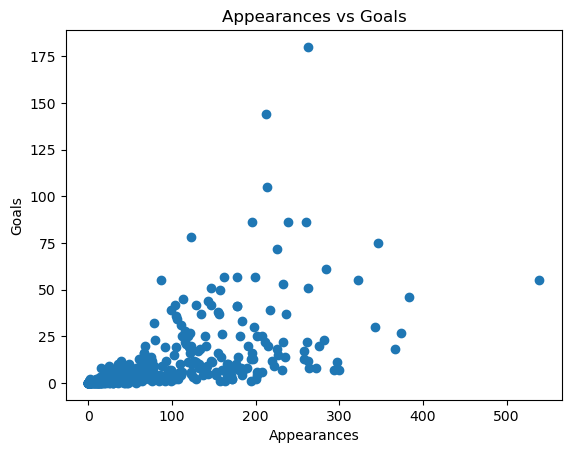

In [19]:
plt.figure()
plt.scatter(raw_data_copy['Appearances'], raw_data_copy['Goals'])
plt.xlabel('Appearances')
plt.ylabel('Goals')
plt.title('Appearances vs Goals')
plt.show()


### Scatter — Age vs Goals

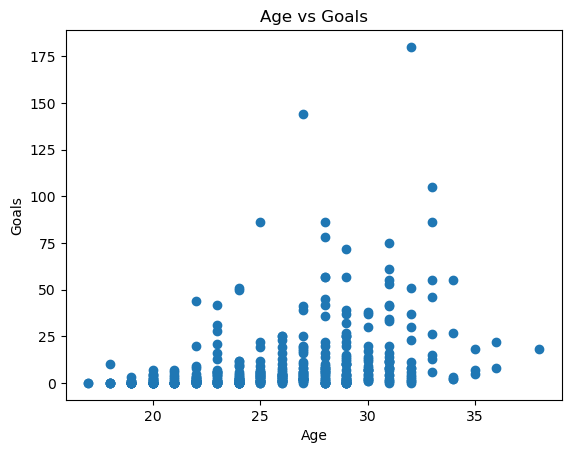

In [20]:
plt.figure()
plt.scatter(raw_data_copy['Age'], raw_data_copy['Goals'])
plt.xlabel('Age')
plt.ylabel('Goals')
plt.title('Age vs Goals')
plt.show()


### Bar Chart — Club vs Goals (Sum)

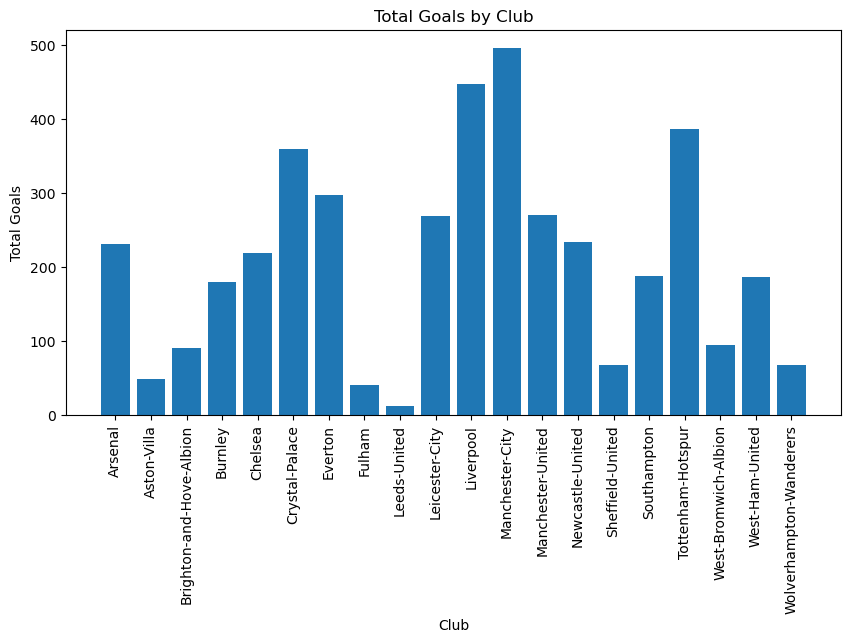

In [21]:
club_goals = raw_data_copy.groupby('Club')['Goals'].sum()

plt.figure(figsize=(10,5))
plt.bar(club_goals.index, club_goals.values)
plt.xlabel('Club')
plt.ylabel('Total Goals')
plt.title('Total Goals by Club')
plt.xticks(rotation=90)
plt.show()


### Bar Chart — Position vs Goals (Average)

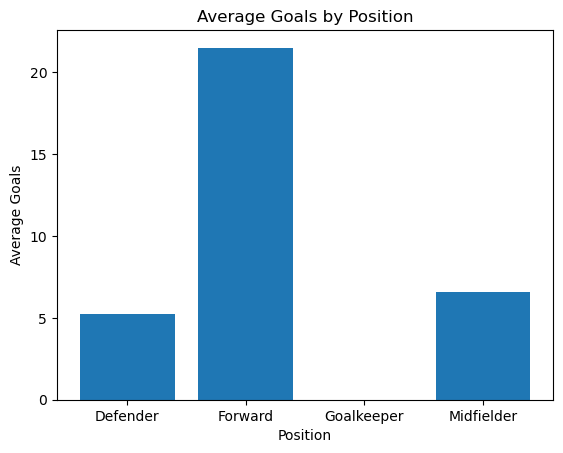

In [22]:
position_avg_goals = raw_data_copy.groupby('Position')['Goals'].mean()

plt.figure()
plt.bar(position_avg_goals.index, position_avg_goals.values)
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.title('Average Goals by Position')
plt.show()


### Scatter — Shots vs Goals

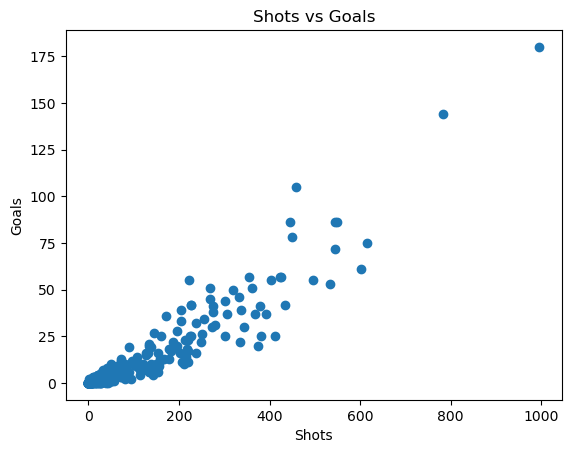

In [23]:
plt.figure()
plt.scatter(raw_data_copy['Shots'], raw_data_copy['Goals'])
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.title('Shots vs Goals')
plt.show()


### Scatter — Assists vs Goals

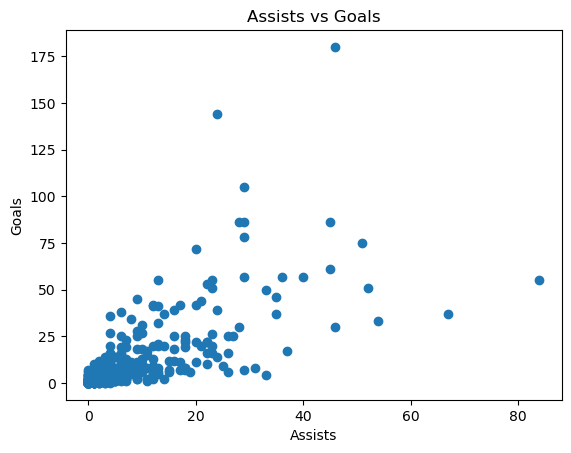

In [24]:
plt.figure()
plt.scatter(raw_data_copy['Assists'], raw_data_copy['Goals'])
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.title('Assists vs Goals')
plt.show()


### Scatter — Passes vs Assists

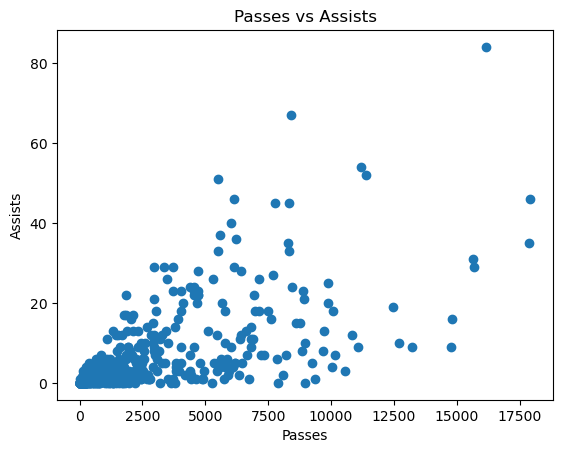

In [25]:
plt.figure()
plt.scatter(raw_data_copy['Passes'], raw_data_copy['Assists'])
plt.xlabel('Passes')
plt.ylabel('Assists')
plt.title('Passes vs Assists')
plt.show()


In [26]:
raw_data_copy['Tackle success %'].dtype


dtype('O')

In [27]:
# converting the string values into numerical values, as matplotlib cannot plot string values

raw_data_copy['Tackle success %'] = (
    raw_data_copy['Tackle success %']
    .astype(str)
    .str.replace('%', '', regex=False)
)

raw_data_copy['Tackle success %'] = pd.to_numeric(
    raw_data_copy['Tackle success %'],
    errors='coerce'
)


### Scatter — Tackles vs Tackle Success %

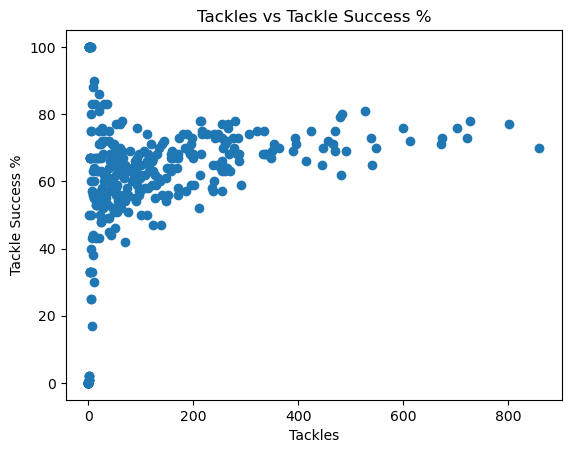

In [28]:
plt.figure()
plt.scatter(raw_data_copy['Tackles'], raw_data_copy['Tackle success %'])
plt.xlabel('Tackles')
plt.ylabel('Tackle Success %')
plt.title('Tackles vs Tackle Success %')
plt.show()


## FEATURE SCALING

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
# priting values of goals, appearances and passes
print(raw_data_copy[['Goals', 'Appearances', 'Passes']].head())


   Goals  Appearances  Passes
0    NaN           64  1783.0
1    NaN            0     NaN
2    NaN            0     NaN
3    7.0          160  7125.0
4    1.0           16   519.0


In [31]:
# Applying min-max scaling

minmax_scaler = MinMaxScaler()

raw_data_copy[['Goals_mm', 'Appearances_mm', 'Passes_mm', 'Assists_mm']] = (
    minmax_scaler.fit_transform(
        raw_data_copy[['Goals', 'Appearances', 'Passes', 'Assists']]
    )
)


In [32]:
# Apply standardization (z-score)

std_scaler = StandardScaler()

raw_data_copy[['Goals_std', 'Shots_std', 'Passes_std']] = (
    std_scaler.fit_transform(
        raw_data_copy[['Goals', 'Shots', 'Passes']]
    )
)


## Comparing scatter plots before vs. after feature scaling

### Goals vs Appearances (Before Scaling)

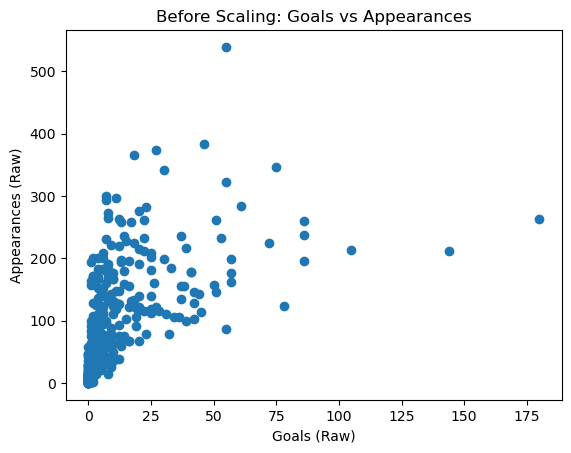

In [33]:
plt.figure()
plt.scatter(raw_data_copy['Goals'], raw_data_copy['Appearances'])
plt.xlabel('Goals (Raw)')
plt.ylabel('Appearances (Raw)')
plt.title('Before Scaling: Goals vs Appearances')
plt.show()


### Goals vs Appearances (After Min-Max Scaling)

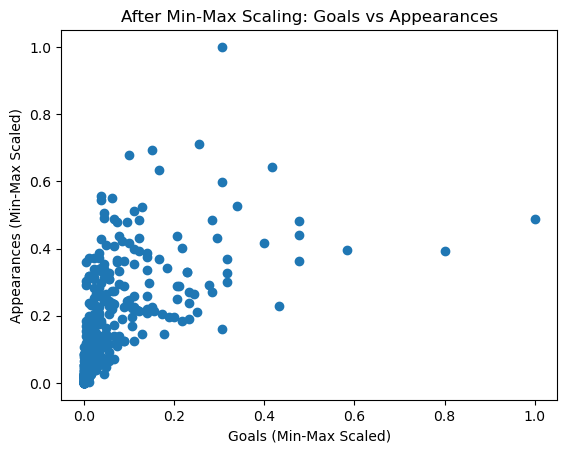

In [34]:
plt.figure()
plt.scatter(
    raw_data_copy['Goals_mm'],
    raw_data_copy['Appearances_mm']
)
plt.xlabel('Goals (Min-Max Scaled)')
plt.ylabel('Appearances (Min-Max Scaled)')
plt.title('After Min-Max Scaling: Goals vs Appearances')
plt.show()


### Goals vs Passes (Before Scaling)

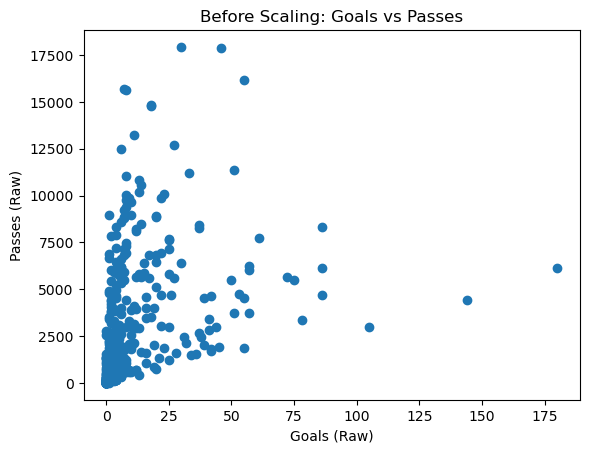

In [35]:
plt.figure()
plt.scatter(raw_data_copy['Goals'], raw_data_copy['Passes'])
plt.xlabel('Goals (Raw)')
plt.ylabel('Passes (Raw)')
plt.title('Before Scaling: Goals vs Passes')
plt.show()


### Goals vs Passes (After Standardization)

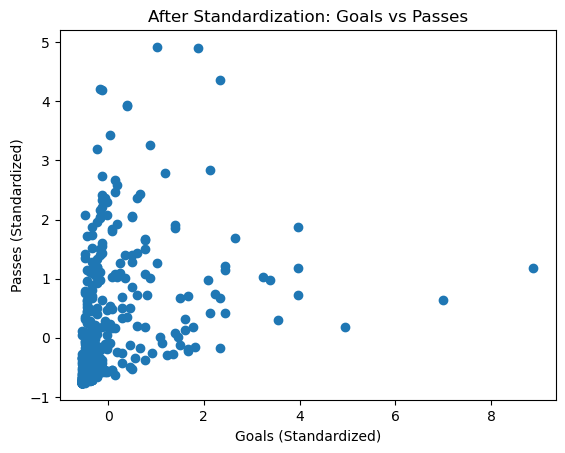

In [36]:
plt.figure()
plt.scatter(
    raw_data_copy['Goals_std'],
    raw_data_copy['Passes_std']
)
plt.xlabel('Goals (Standardized)')
plt.ylabel('Passes (Standardized)')
plt.title('After Standardization: Goals vs Passes')
plt.show()


In [37]:
raw_data_copy.columns

Index(['Club', 'Position', 'Age', 'Appearances', 'Wins', 'Losses', 'Goals',
       'Goals per match', 'Headed goals', 'Goals with right foot',
       'Goals with left foot', 'Penalties scored', 'Freekicks scored', 'Shots',
       'Shots on target', 'Shooting accuracy %', 'Hit woodwork',
       'Big chances missed', 'Clean sheets', 'Goals conceded', 'Tackles',
       'Tackle success %', 'Last man tackles', 'Blocked shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow cards',
       'Red cards', 'Fouls', 'Of

### Here, for any specific role, all the features that are not associated with the role are represented as NaN, but a dataset with nan values cannot be used   by the ML model by ROLE AWARE NAN FILLING

## Training the match prediction model

In [38]:
# since we do not already have the match outcome column, so here we need to make an additional column, which compares the values of wins and losses and assigns a label win/loss/draw to each row
def get_match_outcome(row):
    if row['Wins'] > row['Losses']:
        return 'Win'
    elif row['Wins'] < row['Losses']:
        return 'Loss'
    else:
        return 'Draw'

raw_data_copy['MatchOutcome'] = raw_data_copy.apply(get_match_outcome, axis=1)


### we will be training 2 separate models, one REGRESSION to predict the individual player performance (goals) and other CLASSIFICATION model to predict match outcome

In [39]:
# creating a single performance column for multiple player roles

raw_data_copy['PerformanceScore'] = (
    raw_data_copy['Goals_mm'] +
    raw_data_copy['Assists_mm'] +
    raw_data_copy['Tackles'] / raw_data_copy['Tackles'].max() +
    raw_data_copy['Clearances'] / raw_data_copy['Clearances'].max() +
    raw_data_copy['Saves'] / raw_data_copy['Saves'].max() +
    raw_data_copy['Clean sheets'] / raw_data_copy['Clean sheets'].max()
)


In [40]:
raw_data_copy['Shooting accuracy %'] = (
    raw_data_copy['Shooting accuracy %']
    .str.replace('%', '', regex=False)
    .astype(float)
)


In [41]:
raw_data_copy['Shooting accuracy %'] = raw_data_copy['Shooting accuracy %'].fillna(0)


In [42]:
raw_data_copy['Cross accuracy %'] = (
    raw_data_copy['Cross accuracy %']
    .str.replace('%', '', regex=False)
    .astype(float)
)



In [43]:
raw_data_copy['Cross accuracy %'] = raw_data_copy['Cross accuracy %'].fillna(0)


In [44]:
raw_data_copy['Tackle success %'] = (
    raw_data_copy['Tackle success %']
    .fillna(0)
    .astype(float)
)




In [45]:
# defining all the role based columns at one place, to then handle the nan values
role_based_cols = set(
    goal_keeper_cols +
    defender_cols +
    midfielder_cols +
    attacker_cols
)


In [46]:
raw_data_copy['Position'].unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], dtype=object)

In [47]:
# creating a function for role aware nan handling of the rows, for example for a given row, we will check the position to which the plaeyr belongs, and then the nans in all the non-role columns will be set to 0
def fill_role_based_nans(df):
    df = df.copy()

    for idx, row in df.iterrows():
        pos = row['Position']

        if pos == 'Goalkeeper':
            allowed = set(goal_keeper_cols)
        elif pos == 'Defender':
            allowed = set(defender_cols)
        elif pos == 'Midfielder':
            allowed = set(midfielder_cols)
        elif pos == 'Forward':
            allowed = set(attacker_cols)
        else:
            continue

        # columns that should be zero for this role
        zero_cols = role_based_cols - allowed

        for col in zero_cols:
            if col in df.columns:
                df.at[idx, col] = 0

    return df


In [48]:
raw_data_copy = fill_role_based_nans(raw_data_copy)


In [49]:
raw_data_copy.head()

,Club,Position,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,...,Offsides,Goals_mm,Appearances_mm,Passes_mm,Assists_mm,Goals_std,Shots_std,Passes_std,MatchOutcome,PerformanceScore
0,Arsenal,Goalkeeper,28.0,64,28,16,0.0,0.0,0.0,0.0,...,NaN,NaN,0.118738,0.099431,NaN,NaN,NaN,-0.199139,Win,NaN
1,Arsenal,Goalkeeper,26.0,0,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,Draw,NaN
2,Arsenal,Goalkeeper,25.0,0,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,Draw,NaN
3,Arsenal,Defender,25.0,160,90,37,0.0,0.0,0.0,0.0,...,8.0,0.038889,0.296846,0.397334,0.214286,-0.171591,NaN,1.494694,Win,NaN
4,Arsenal,Defender,23.0,16,7,5,0.0,0.0,0.0,0.0,...,0.0,0.005556,0.029685,0.028943,0.011905,-0.485466,NaN,-0.599926,Win,NaN


In [50]:
# now handling the nan values in non role-based columns
non_role_numeric_cols = [
    'Age', 'Appearances', 'Wins', 'Losses',
    'Yellow cards', 'Red cards',
    'Fouls', 'Offsides'
]


In [51]:
raw_data_copy[non_role_numeric_cols] = (
    raw_data_copy[non_role_numeric_cols]
    .fillna(raw_data_copy[non_role_numeric_cols].median())
)


In [52]:
# now we will replace the role based nan values with the medians
# first we will calculate the respective medians of each rol based columns using the rows which belong to that particular role only
role_columns = {
    'Goalkeeper': goal_keeper_cols,
    'Defender': defender_cols,
    'Midfielder': midfielder_cols,
    'Attacker': attacker_cols
}

role_medians = {}

for role, cols in role_columns.items():
    role_medians[role] = (
        raw_data_copy[raw_data_copy['Position'] == role][cols]
        .median()
    )


In [53]:
print(role_medians)

{'Goalkeeper': Saves                 20.0
Penalties saved        0.0
Punches                2.0
High Claims            6.0
Catches                3.0
Sweeper clearances     4.0
Throw outs            39.0
Goal Kicks            53.0
dtype: float64, 'Defender': Tackles                 57.5
Tackle success %        62.0
Last man tackles         0.0
Interceptions           44.5
Clearances             109.5
Headed Clearance        52.5
Clearances off line      0.0
Recoveries             175.0
Blocked shots            3.0
Aerial battles won      62.0
Aerial battles lost     53.5
dtype: float64, 'Midfielder': Passes                 1238.50
Passes per match         27.37
Assists                   2.00
Through balls             3.00
Accurate long balls      54.50
Crosses                  35.50
Cross accuracy %         18.50
Big chances created       3.00
dtype: float64, 'Attacker': Goals                   NaN
Goals per match         NaN
Shots                   NaN
Shots on target         NaN
Big 

In [54]:
# dropping the columns for which even the role based median is nan
dropped_columns = set()

for role, medians in role_medians.items():
    cols_to_drop = medians[medians.isna()].index
    dropped_columns.update(cols_to_drop)

raw_data_copy = raw_data_copy.drop(columns=dropped_columns)



In [55]:
raw_data_copy.shape

(571, 53)

In [56]:
dropped_columns

{'Big chances missed',
 'Freekicks scored',
 'Goals',
 'Goals per match',
 'Goals with left foot',
 'Goals with right foot',
 'Headed goals',
 'Hit woodwork',
 'Penalties scored',
 'Shooting accuracy %',
 'Shots',
 'Shots on target'}

In [57]:
# now updating the role_columns and role_wise_medians
for role in role_columns:
    role_columns[role] = [
        col for col in role_columns[role]
        if col not in dropped_columns
    ]


In [58]:
# now calculating the updated medians for the role-based columuns
role_medians_updated = {}

for role, cols in role_columns.items():
    role_medians_updated[role] = (
        raw_data_copy[raw_data_copy['Position'] == role][cols]
        .median()
    )


In [59]:
print(role_medians_updated)

{'Goalkeeper': Saves                 20.0
Penalties saved        0.0
Punches                2.0
High Claims            6.0
Catches                3.0
Sweeper clearances     4.0
Throw outs            39.0
Goal Kicks            53.0
dtype: float64, 'Defender': Tackles                 57.5
Tackle success %        62.0
Last man tackles         0.0
Interceptions           44.5
Clearances             109.5
Headed Clearance        52.5
Clearances off line      0.0
Recoveries             175.0
Blocked shots            3.0
Aerial battles won      62.0
Aerial battles lost     53.5
dtype: float64, 'Midfielder': Passes                 1238.50
Passes per match         27.37
Assists                   2.00
Through balls             3.00
Accurate long balls      54.50
Crosses                  35.50
Cross accuracy %         18.50
Big chances created       3.00
dtype: float64, 'Attacker': Series([], dtype: float64)}


In [60]:
# sanity checks
# Check no dropped columns remain
for role, cols in role_columns.items():
    assert all(col in raw_data_copy.columns for col in cols)

# Check no NaN medians
for role, medians in role_medians_updated.items():
    assert not medians.isna().any()


In [61]:
# now replacing the role-based nans with their respective medians
for role, cols in role_columns.items():
    mask = raw_data_copy['Position'] == role

    raw_data_copy.loc[mask, cols] = (
        raw_data_copy.loc[mask, cols]
        .fillna(role_medians[role])
    )


In [62]:
# sanity check - if any nan is left in the role based columns
for role, cols in role_columns.items():
    remaining = (
        raw_data_copy.loc[raw_data_copy['Position'] == role, cols]
        .isna().sum()
        .sum()
    )
    print(f"{role}: remaining NaNs →", remaining)


Goalkeeper: remaining NaNs → 0
Defender: remaining NaNs → 0
Midfielder: remaining NaNs → 0
Attacker: remaining NaNs → 0.0


In [63]:
raw_data_copy.isna().sum()

Club                        0
Position                    0
Age                         0
Appearances                 0
Wins                        0
Losses                      0
Clean sheets              309
Goals conceded            309
Tackles                     0
Tackle success %            0
Last man tackles            0
Blocked shots               0
Interceptions               0
Clearances                  0
Headed Clearance            0
Clearances off line         0
Recoveries                  0
Duels won                 181
Duels lost                181
Successful 50/50s         181
Aerial battles won          0
Aerial battles lost         0
Own goals                 309
Errors leading to goal    112
Assists                     0
Passes                      0
Passes per match            0
Big chances created         0
Crosses                     0
Cross accuracy %            0
Through balls               0
Accurate long balls         0
Saves                       0
Penalties 

In [64]:
# now handling some remaining nans individually
gk_match_cols = ['Clean sheets', 'Goals conceded', 'Own goals']
raw_data_copy[gk_match_cols] = raw_data_copy[gk_match_cols].fillna(0)

duel_cols = ['Duels won', 'Duels lost', 'Successful 50/50s']
raw_data_copy[duel_cols] = raw_data_copy[duel_cols].fillna(
    raw_data_copy[duel_cols].median()
)

raw_data_copy['Errors leading to goal'] = (
    raw_data_copy['Errors leading to goal'].fillna(0)
)



In [65]:
raw_data_copy[['Appearances', 'Passes', 'Assists']].isna().sum()


Appearances    0
Passes         0
Assists        0
dtype: int64

In [66]:
raw_data_copy = raw_data_copy.drop(columns=['Goals_mm'])


In [67]:
mm_cols_to_drop = ['Appearances_mm', 'Passes_mm', 'Assists_mm']

raw_data_copy = raw_data_copy.drop(columns=mm_cols_to_drop, errors='ignore')


In [68]:
raw_data_copy[['Appearances_mm', 'Passes_mm', 'Assists_mm']] = (
    minmax_scaler.fit_transform(
        raw_data_copy[['Appearances', 'Passes', 'Assists']]
    )
)


In [69]:
raw_data_copy = raw_data_copy.drop(columns="PerformanceScore")

In [70]:
raw_data_copy['PerformanceScore'] = (
    raw_data_copy['Assists_mm'] +
    raw_data_copy['Tackles'] / raw_data_copy['Tackles'].max() +
    raw_data_copy['Clearances'] / raw_data_copy['Clearances'].max() +
    raw_data_copy['Saves'] / raw_data_copy['Saves'].max() +
    raw_data_copy['Clean sheets'] / raw_data_copy['Clean sheets'].max()
)

In [71]:
raw_data_copy.isna().sum()[raw_data_copy.isna().sum() > 0]



Goals_std     164
Shots_std     262
Passes_std     24
dtype: int64

In [72]:
raw_data_copy.columns

Index(['Club', 'Position', 'Age', 'Appearances', 'Wins', 'Losses',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow cards',
       'Red cards', 'Fouls', 'Offsides', 'Goals_std', 'Shots_std',
       'Passes_std', 'MatchOutcome', 'Appearances_mm', 'Passes_mm',
       'Assists_mm', 'PerformanceScore'],
      dtype='object')

In [73]:
# creating copies of the data we have, to be separately used for the classification and regression model

# Regression dataset
# reg_data = raw_data_copy.copy()

# # Classification dataset
# clas_data = raw_data_copy.copy()


## REGRESSION MODEL

In [74]:
# y_reg = reg_data['PerformanceScore']

# X_reg = reg_data.drop(
#     columns=[
#         'PerformanceScore',
#         'MatchOutcome',
#         'Goals',        # already used inside PerformanceScore
#         'Club',
#         'Position'
#     ],
#     errors='ignore'
# )


In [75]:
# from sklearn.model_selection import train_test_split

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
#     X_reg, y_reg,
#     test_size=0.2,
#     random_state=42
# )


In [76]:
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)

# y_pred_reg = lin_reg.predict(X_test_reg)


## Approach - 1 - we will encode categorical variables, label encode the target classes, then train the classification and regression modelsseparately

In [77]:
import pandas as pd

# Targets
y_reg = raw_data_copy["PerformanceScore"]
y_class = raw_data_copy["MatchOutcome"]

# Input features
X = raw_data_copy.drop(columns=["PerformanceScore", "MatchOutcome"])


In [78]:
# one hot encoding categorical input features only
X_encoded = pd.get_dummies(
    X,
    columns=["Club", "Position"],
    drop_first=True
)


In [79]:
# label encoding the classification target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)


In [80]:
# on evaluating the baseline regression model, we observed an overfitting which is occuring due to data leakage, so we will remove the columns causing leakage from the regression data and retrain 
# these columns are leakage columns because they are directly involved in calculating performance score which is the target variable

leakage_cols = [
    "Assists_mm",
    "Tackles",
    "Clearances",
    "Saves",
    "Clean sheets"
]

X_reg = X_encoded.drop(columns=leakage_cols, errors="ignore")


In [81]:
# train test split for regression model

from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


In [82]:
# imputing values for regression

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_reg = imputer.fit_transform(X_train_reg)
X_test_reg  = imputer.transform(X_test_reg)


In [83]:
# train test split for classification model

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_encoded, y_class_encoded, test_size=0.2, random_state=42
)


In [84]:
# imputing values for classification model

imputer_cls = SimpleImputer(strategy="median")
X_train_cls = imputer_cls.fit_transform(X_train_cls)
X_test_cls  = imputer_cls.transform(X_test_cls)

In [85]:
# baseline regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_reg)


In [86]:
# baseline classification model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cls, y_train_cls)

y_pred_cls = log_reg.predict(X_test_cls)


c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
# regression model evaluation (accuracy, mae, rmse, r2)

y_pred_reg = lin_reg.predict(X_test_reg)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 0.025344314962863414
RMSE: 0.045226849883055704
R²: 0.9793436581494204


In [88]:
# classification model evaluation

y_pred_cls = log_reg.predict(X_test_cls)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls, average="weighted")
recall = recall_score(y_test_cls, y_pred_cls, average="weighted")
f1 = f1_score(y_test_cls, y_pred_cls, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9565217391304348
Precision: 0.95832083958021
Recall: 0.9565217391304348
F1-score: 0.9569013112491372


## Visualisation of baseline models

### Actual vs Predicted for regression

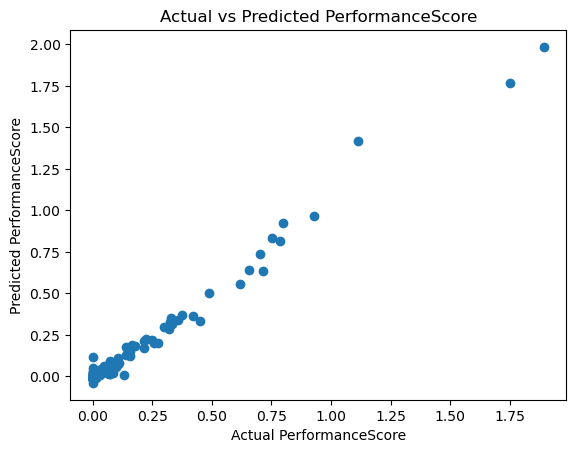

In [89]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual PerformanceScore")
plt.ylabel("Predicted PerformanceScore")
plt.title("Actual vs Predicted PerformanceScore")
plt.show()


### Confusion matrix for classification


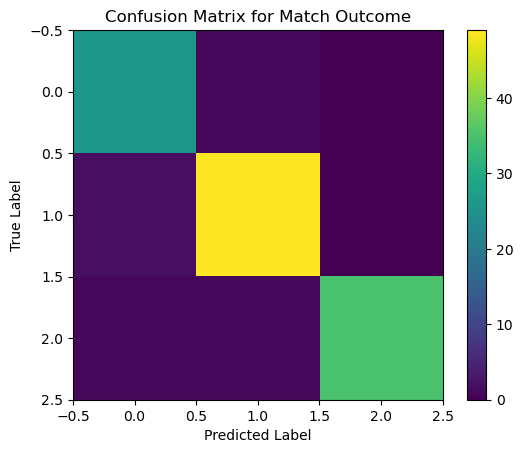

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cls, y_pred_cls)

plt.figure()
plt.imshow(cm)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Match Outcome")
plt.colorbar()
plt.show()


## Advanced models

### Training and evaluation of random forest for regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)


In [92]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("RF MAE:", mean_absolute_error(y_test_reg, y_pred_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)))
print("RF R²:", r2_score(y_test_reg, y_pred_rf))


RF MAE: 0.019977432468031405
RF RMSE: 0.043848466279049245
RF R²: 0.9805835625581167


### Gradient boosting classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

gb_cls = GradientBoostingClassifier(random_state=42)
gb_cls.fit(X_train_cls, y_train_cls)

y_pred_gb = gb_cls.predict(X_test_cls)


In [94]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test_cls, y_pred_gb))
print("Precision:", precision_score(y_test_cls, y_pred_gb, average="weighted"))
print("Recall:", recall_score(y_test_cls, y_pred_gb, average="weighted"))
print("F1:", f1_score(y_test_cls, y_pred_gb, average="weighted"))


Accuracy: 0.9565217391304348
Precision: 0.9570092581741476
Recall: 0.9565217391304348
F1: 0.9563730955035303


## Hyperparameter tuning

### tuning and evaluation of random forest regressor

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2"
)

grid_rf.fit(X_train_reg, y_train_reg)

best_rf = grid_rf.best_estimator_


In [96]:
# Evaluation
y_pred_best_rf = best_rf.predict(X_test_reg)

mae_rf = mean_absolute_error(y_test_reg, y_pred_best_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_best_rf))
r2_rf = r2_score(y_test_reg, y_pred_best_rf)

print("Best RF MAE:", mae_rf)
print("Best RF RMSE:", rmse_rf)
print("Best RF R²:", r2_rf)

Best RF MAE: 0.020309358711044518
Best RF RMSE: 0.04497124276169534
Best RF R²: 0.9795764839132847


### Hyperparameter tuning and evaluation for gradient boosting classifier


In [97]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

rand_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_dist,
    cv=5,
    scoring="f1_weighted"
)

rand_gb.fit(X_train_cls, y_train_cls)

best_gb = rand_gb.best_estimator_


c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [98]:
# Evaluation
y_pred_best_gb = best_gb.predict(X_test_cls)

acc_gb = accuracy_score(y_test_cls, y_pred_best_gb)
prec_gb = precision_score(y_test_cls, y_pred_best_gb, average="weighted")
rec_gb = recall_score(y_test_cls, y_pred_best_gb, average="weighted")
f1_gb = f1_score(y_test_cls, y_pred_best_gb, average="weighted")

print("Best GB Accuracy:", acc_gb)
print("Best GB Precision:", prec_gb)
print("Best GB Recall:", rec_gb)
print("Best GB F1-score:", f1_gb)

Best GB Accuracy: 0.9565217391304348
Best GB Precision: 0.9563730955035303
Best GB Recall: 0.9565217391304348
Best GB F1-score: 0.9563505785343795


## Saving the models and imputers

In [ ]:
# import joblib

# joblib.dump(best_rf, "best_random_forest_regressor.pkl")
# joblib.dump(best_gb, "best_gradient_boosting_classifier.pkl")

# joblib.dump(imputer, "regression_imputer.pkl")
# joblib.dump(imputer_cls, "classification_imputer.pkl")


['classification_imputer.pkl']

## Training on top 5 features for better input handling of the website

In [101]:
reg_top5_features = [
    "Assists_mm",
    "Tackles",
    "Clearances",
    "Saves",
    "Clean sheets"
]

cls_top5_features = [
    "Shots_std",
    "Big chances created",
    "Passes",
    "Yellow cards",
    "Red cards"
]


In [102]:
X_reg = raw_data_copy[reg_top5_features]
y_reg = raw_data_copy["PerformanceScore"]


In [103]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)

In [104]:
new_reg_imputer = SimpleImputer(strategy="median")

X_train_reg_imp = new_reg_imputer.fit_transform(X_train_reg)
X_test_reg_imp  = new_reg_imputer.transform(X_test_reg)


In [105]:
reg_model_top5 = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

reg_model_top5.fit(X_train_reg_imp, y_train_reg)

RandomForestRegressor(n_estimators=200, random_state=42)

In [106]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2"
)

grid_rf.fit(X_train_reg_imp, y_train_reg)

best_rf_top5 = grid_rf.best_estimator_

In [107]:
# Evaluation
y_pred_best_rf_top5 = best_rf_top5.predict(X_test_reg_imp)

mae_rf = mean_absolute_error(y_test_reg, y_pred_best_rf_top5)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_best_rf_top5))
r2_rf = r2_score(y_test_reg, y_pred_best_rf_top5)

print("Best RF MAE:", mae_rf)
print("Best RF RMSE:", rmse_rf)
print("Best RF R²:", r2_rf)

Best RF MAE: 0.015851429875846187
Best RF RMSE: 0.054847796672517275
Best RF R²: 0.9696206060948767


In [108]:
X_cls = raw_data_copy[cls_top5_features]
y_cls = raw_data_copy["MatchOutcome"]


In [109]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls,
    y_cls,
    test_size=0.2,
    random_state=42,
    stratify=y_cls
)


In [110]:
new_cls_imputer = SimpleImputer(strategy="median")

X_train_cls_imp = new_cls_imputer.fit_transform(X_train_cls)
X_test_cls_imp  = new_cls_imputer.transform(X_test_cls)


In [111]:
from sklearn.ensemble import GradientBoostingClassifier

cls_model = GradientBoostingClassifier(random_state=42)

cls_model.fit(X_train_cls_imp, y_train_cls)


GradientBoostingClassifier(random_state=42)

In [112]:
# hyperparameter tuning
param_dist = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

rand_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_dist,
    cv=5,
    scoring="f1_weighted"
)

rand_gb.fit(X_train_cls_imp, y_train_cls)

best_gb_top5 = rand_gb.best_estimator_


c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [114]:
# Evaluation
y_pred_best_gb_top5 = best_gb_top5.predict(X_test_cls_imp)

acc_gb = accuracy_score(y_test_cls, y_pred_best_gb_top5)
prec_gb = precision_score(y_test_cls, y_pred_best_gb_top5, average="weighted")
rec_gb = recall_score(y_test_cls, y_pred_best_gb_top5, average="weighted")
f1_gb = f1_score(y_test_cls, y_pred_best_gb_top5, average="weighted")

print("Best GB Accuracy:", acc_gb)
print("Best GB Precision:", prec_gb)
print("Best GB Recall:", rec_gb)
print("Best GB F1-score:", f1_gb)

Best GB Accuracy: 0.6086956521739131
Best GB Precision: 0.6099544072948329
Best GB Recall: 0.6086956521739131
Best GB F1-score: 0.6052684979895533


In [115]:
import joblib

joblib.dump(best_rf_top5, "top5_random_forest_regressor.pkl")
joblib.dump(best_gb_top5, "top5_gradient_boosting_classifier.pkl")

joblib.dump(new_reg_imputer, "top5_regression_imputer.pkl")
joblib.dump(new_cls_imputer, "top5_classification_imputer.pkl")

['top5_classification_imputer.pkl']

## Loading and testing

In [125]:
reg_test_1 = {
    "Assists_mm": 0.40,
    "Tackles": 45,
    "Clearances": 38,
    "Saves": 0,
    "Clean sheets": 1
}


reg_test_2 = {
    "Assists_mm": 0.25,
    "Tackles": 25,
    "Clearances": 12,
    "Saves": 0,
    "Clean sheets": 0
}

reg_test_3 = {
    "Assists_mm": 0.05,
    "Tackles": 5,
    "Clearances": 3,
    "Saves": 6,
    "Clean sheets": 1
}

reg_worst = {
    "Assists_mm": 0.0,
    "Tackles": 0,
    "Clearances": 0,
    "Saves": 0,
    "Clean sheets": 0
}

reg_best = {
    "Assists_mm": 1.0,
    "Tackles": X_reg["Tackles"].max(),
    "Clearances": X_reg["Clearances"].max(),
    "Saves": X_reg["Saves"].max(),
    "Clean sheets": X_reg["Clean sheets"].max()
}



In [126]:
import pandas as pd
import joblib

# Load model & imputer
reg_model = joblib.load("top5_random_forest_regressor.pkl")
reg_imputer = joblib.load("top5_regression_imputer.pkl")

# Create DataFrame
reg_input_df = pd.DataFrame([reg_test_1, reg_test_2, reg_test_3, reg_worst, reg_best])

# Impute & predict
X_reg_imp = reg_imputer.transform(reg_input_df)
reg_preds = reg_model.predict(X_reg_imp)

print(reg_preds)

# Display results
for i, score in enumerate(reg_preds, 1):
    print(f"Test Case {i} - Predicted Performance Score: {score:.2f} / 5")


[4.01250000e-01 2.46904762e-01 4.76190476e-02 2.21727754e-04
 2.55454921e+00]
Test Case 1 - Predicted Performance Score: 0.40 / 5
Test Case 2 - Predicted Performance Score: 0.25 / 5
Test Case 3 - Predicted Performance Score: 0.05 / 5
Test Case 4 - Predicted Performance Score: 0.00 / 5
Test Case 5 - Predicted Performance Score: 2.55 / 5


In [120]:
cls_test_1 = {
    "Shots_std": 3.2,
    "Big chances created": 6,
    "Passes": 580,
    "Yellow cards": 1,
    "Red cards": 0
}

cls_test_2 = {
    "Shots_std": 1.8,
    "Big chances created": 2,
    "Passes": 450,
    "Yellow cards": 3,
    "Red cards": 0
}

cls_test_3 = {
    "Shots_std": 1.0,
    "Big chances created": 1,
    "Passes": 380,
    "Yellow cards": 5,
    "Red cards": 1
}


In [123]:
import pandas as pd
import joblib

# Load model & imputer
cls_model = joblib.load("top5_gradient_boosting_classifier.pkl")
cls_imputer = joblib.load("top5_classification_imputer.pkl")

# Create DataFrame
cls_input_df = pd.DataFrame([cls_test_1, cls_test_2, cls_test_3])

# Impute & predict
X_cls_imp = cls_imputer.transform(cls_input_df)
cls_preds = cls_model.predict(X_cls_imp)

print(cls_preds)


['Win' 'Win' 'Loss']


In [127]:
raw_data_copy['MatchOutcome'].unique()

array(['Win', 'Draw', 'Loss'], dtype=object)

In [128]:
print(X_reg["Tackles"].max())
print(X_reg["Clearances"].max())
print(X_reg["Saves"].max())
print(X_reg["Clean sheets"].max())

728.0
2974.0
941.0
127.0
